In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

from matplotlib.colors import ListedColormap

import spacy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset, and creating the corpus and storing the titles:

In [2]:
df = pd.read_excel('dataset.xlsx')

corpus, titles = [], []

for text in df['Abstract']:
    corpus.append(str(text))
        
for title in df['Article Title']:
    titles.append(str(title))

Creating the TF-IDF matrix:

In [3]:
nlp = sp.load('en_core_web_sm')

unwanted_pipes = ["ner", "parser"]

def spacy_tokenizer(doc):
  with nlp.disable_pipes(*unwanted_pipes):
    return [t.lemma_ for t in nlp(doc) if \
            not t.is_punct and \
            not t.is_space and \
            not t.is_stop and \
            t.is_alpha]

vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, token_pattern=None)
features = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(features.toarray(), columns=words)

Plotting the words with the highest TF-IDF value in each document:

In [4]:
def TFIDF_top_words(num, top, df_tfidf):
    DF = df_tfidf.T[num].nlargest(top)
    print('Document: ' , num + 1)
    print(30*'-')
    return DF

TFIDF_top_words(10, 5, df_tfidf)

Document:  11
------------------------------


plant         0.275629
author        0.264642
objective     0.232365
rigorously    0.213194
approach      0.196365
Name: 10, dtype: float64

## SVD

Calculating the SVD of the TF-IDF matrix:

In [5]:
n_components = 10

svd = TruncatedSVD(n_components=n_components)
lsa = svd.fit_transform(features)

df_docs_topics = pd.DataFrame(lsa, columns=[f'topic_{n+1}' for n in range(n_components)])
df_words_topics = pd.DataFrame(svd.components_, index=[f'topic_{n+1}' for n in range(n_components)], columns=words).T

Sorting the words by topics matrix by topic:

In [6]:
df_words_topics.sort_values('topic_1', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
nan,1.000000e+00,-7.350731e-14,7.600535e-14,-4.856016e-13,2.587635e-12,-2.941432e-11,3.441789e-11,-7.091923e-12,2.020690e-12,3.160384e-11
metabolite,1.377025e-08,7.311559e-02,-3.396788e-02,-1.307389e-01,1.708811e-01,-2.652934e-02,-1.124231e-01,-1.394936e-02,-5.617477e-03,-1.735140e-01
cancer,1.331668e-08,1.160829e-01,2.201814e-01,2.668585e-01,5.502924e-02,3.173936e-01,-1.323580e-01,-1.874165e-01,-6.846858e-03,-9.096607e-03
secondary,8.955389e-09,4.577630e-02,-3.183475e-02,-8.177628e-02,1.171362e-01,-8.607104e-03,-7.863317e-02,8.098573e-03,-9.827574e-04,-1.215853e-01
library,6.979725e-09,6.944058e-02,-7.242155e-02,-4.485709e-02,-1.322775e-01,-6.722711e-02,-1.075534e-03,-1.835718e-01,1.096747e-02,1.025121e-01
reaction,6.941617e-09,4.140003e-02,-3.272493e-02,-1.222580e-01,-1.705578e-01,1.748459e-01,9.296455e-02,9.975904e-02,-7.061023e-02,-5.392461e-02
fungus,6.389017e-09,2.985652e-02,4.767488e-03,-7.128994e-02,8.046516e-02,-1.034237e-02,-3.697730e-02,1.335471e-02,1.792632e-02,-4.545434e-02
screening,5.850845e-09,7.369764e-02,-3.898993e-02,2.881088e-02,-6.831388e-02,-1.420439e-01,-9.878650e-03,-1.439812e-01,-1.960099e-02,9.912164e-02
antibiotic,5.300611e-09,5.244627e-02,-4.108511e-02,-7.135735e-02,1.208689e-01,-3.163264e-02,-1.317129e-01,2.424219e-01,-1.379434e-01,3.685319e-01
peptide,5.109172e-09,3.758170e-02,-2.037460e-02,-4.090906e-02,-2.687870e-02,2.230697e-03,-7.836649e-02,8.549765e-02,-2.405910e-02,-6.268396e-02


In [7]:
df_words_topics.sort_values('topic_2', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
drug,-8.940228e-10,0.223054,-0.151297,0.174151,0.025116,-0.039753,0.059743,-0.018668,0.009540,0.174541
natural,2.668810e-09,0.220872,-0.188213,0.002147,-0.036432,0.082075,-0.004700,-0.114036,0.064999,0.023799
compound,1.181708e-09,0.206988,0.139485,-0.116726,-0.019521,-0.121923,0.084238,-0.090976,0.215411,0.032503
product,2.461449e-09,0.204120,-0.193476,-0.027936,-0.044458,0.090198,-0.015986,-0.118202,0.030571,0.022857
discovery,-7.399102e-10,0.143905,-0.130958,0.024577,0.031130,-0.018629,-0.002610,-0.066776,-0.031669,0.088256
activity,-1.227578e-08,0.134165,0.178471,-0.113592,0.039536,0.016852,0.080250,0.084109,0.085072,0.069474
new,2.120156e-09,0.127227,-0.021686,-0.062249,0.068233,-0.018733,-0.005137,-0.018877,0.009610,0.142041
cell,-3.802877e-09,0.122193,0.362534,0.103143,-0.015079,0.229550,-0.156880,-0.225406,-0.116715,0.061203
target,-4.249110e-09,0.118522,-0.018402,0.196321,-0.123598,-0.106322,-0.124158,0.025083,0.006703,-0.002328
cancer,1.331668e-08,0.116083,0.220181,0.266859,0.055029,0.317394,-0.132358,-0.187417,-0.006847,-0.009097


In [8]:
df_words_topics.sort_values('topic_3', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
cell,-3.802877e-09,0.122193,0.362534,0.103143,-0.015079,0.229550,-0.156880,-0.225406,-0.116715,0.061203
cancer,1.331668e-08,0.116083,0.220181,0.266859,0.055029,0.317394,-0.132358,-0.187417,-0.006847,-0.009097
mu,3.168210e-09,0.051923,0.200553,-0.121026,0.007965,-0.078427,0.085787,-0.026840,0.009787,0.136033
activity,-1.227578e-08,0.134165,0.178471,-0.113592,0.039536,0.016852,0.080250,0.084109,0.085072,0.069474
line,-2.643667e-09,0.041515,0.141567,-0.021389,-0.002602,0.069607,-0.015741,-0.111275,-0.012462,0.041605
m,3.881053e-09,0.039553,0.141174,-0.057446,-0.027873,-0.048256,0.037346,-0.006186,0.057517,0.081822
compound,1.181708e-09,0.206988,0.139485,-0.116726,-0.019521,-0.121923,0.084238,-0.090976,0.215411,0.032503
extract,-2.813877e-09,0.073485,0.124295,-0.095379,0.091631,-0.121008,0.122342,-0.140847,-0.140820,-0.001705
show,-2.626765e-09,0.060536,0.117482,-0.042098,0.001646,-0.029082,0.012740,0.022197,0.007556,0.006139
g,8.419761e-11,0.029976,0.099221,-0.069950,0.024866,-0.061829,0.052736,-0.000331,-0.045303,0.069370


In [9]:
df_words_topics.sort_values('topic_4', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
cancer,1.331668e-08,0.116083,0.220181,0.266859,0.055029,0.317394,-0.132358,-0.187417,-0.006847,-0.009097
target,-4.249110e-09,0.118522,-0.018402,0.196321,-0.123598,-0.106322,-0.124158,0.025083,0.006703,-0.002328
drug,-8.940228e-10,0.223054,-0.151297,0.174151,0.025116,-0.039753,0.059743,-0.018668,0.009540,0.174541
disease,1.432947e-09,0.085117,-0.016382,0.151317,0.067791,-0.028979,0.059306,0.124189,-0.008044,-0.014551
protein,-8.202597e-10,0.076270,0.033009,0.124574,-0.148899,-0.128525,-0.150922,0.088290,0.034603,-0.118428
treatment,2.499899e-09,0.057538,0.035915,0.106824,0.052809,0.037064,0.013017,0.059696,-0.015574,0.018815
cell,-3.802877e-09,0.122193,0.362534,0.103143,-0.015079,0.229550,-0.156880,-0.225406,-0.116715,0.061203
therapeutic,-5.199204e-10,0.067378,-0.009815,0.101693,0.026340,0.006848,0.010561,0.049092,0.001633,-0.017278
inhibitor,2.717063e-09,0.069044,0.061058,0.097372,-0.119753,-0.094491,-0.086852,0.094352,0.099209,-0.011664
anticancer,-2.324784e-09,0.062288,0.049458,0.086556,0.052794,0.138680,-0.010957,-0.052348,0.068007,-0.015686


In [10]:
df_words_topics.sort_values('topic_5', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
plant,3.025256e-09,0.109728,-0.005132,0.068136,0.259202,-0.062340,0.380833,0.014634,-0.184623,-0.294556
marine,-7.402058e-09,0.092518,-0.043449,-0.135185,0.255434,0.099450,-0.182674,-0.035362,0.506305,-0.083926
metabolite,1.377025e-08,0.073116,-0.033968,-0.130739,0.170881,-0.026529,-0.112423,-0.013949,-0.005617,-0.173514
source,1.595942e-09,0.089146,-0.069665,-0.014442,0.133468,0.021220,0.004843,-0.048210,0.079913,-0.022406
antibiotic,5.300611e-09,0.052446,-0.041085,-0.071357,0.120869,-0.031633,-0.131713,0.242422,-0.137943,0.368532
secondary,8.955389e-09,0.045776,-0.031835,-0.081776,0.117136,-0.008607,-0.078633,0.008099,-0.000983,-0.121585
antimicrobial,3.498025e-10,0.039626,0.009888,-0.063634,0.099101,-0.025253,-0.012357,0.116608,-0.025507,0.110281
extract,-2.813877e-09,0.073485,0.124295,-0.095379,0.091631,-0.121008,0.122342,-0.140847,-0.140820,-0.001705
microorganism,9.358626e-10,0.029752,-0.028392,-0.047473,0.088964,0.006114,-0.056773,0.010888,0.056299,-0.011214
review,-6.753093e-10,0.093573,-0.087295,0.048282,0.086717,0.093716,0.036252,0.050973,0.055451,-0.020020


In [11]:
df_words_topics.sort_values('topic_6', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
cancer,1.331668e-08,0.116083,0.220181,0.266859,0.055029,0.317394,-0.132358,-0.187417,-0.006847,-0.009097
synthesis,-2.217302e-09,0.074155,-0.078456,-0.158630,-0.207072,0.247815,0.093551,0.092466,-0.015763,0.005793
cell,-3.802877e-09,0.122193,0.362534,0.103143,-0.015079,0.229550,-0.156880,-0.225406,-0.116715,0.061203
reaction,6.941617e-09,0.041400,-0.032725,-0.122258,-0.170558,0.174846,0.092965,0.099759,-0.070610,-0.053925
anticancer,-2.324784e-09,0.062288,0.049458,0.086556,0.052794,0.138680,-0.010957,-0.052348,0.068007,-0.015686
synthetic,-4.250177e-09,0.067571,-0.070091,-0.049011,-0.086533,0.112237,0.026338,0.025707,-0.006811,0.036585
marine,-7.402058e-09,0.092518,-0.043449,-0.135185,0.255434,0.099450,-0.182674,-0.035362,0.506305,-0.083926
review,-6.753093e-10,0.093573,-0.087295,0.048282,0.086717,0.093716,0.036252,0.050973,0.055451,-0.020020
product,2.461449e-09,0.204120,-0.193476,-0.027936,-0.044458,0.090198,-0.015986,-0.118202,0.030571,0.022857
tumor,1.343047e-10,0.029384,0.072788,0.052897,0.004700,0.082796,-0.042001,-0.042689,-0.008561,0.007117


In [12]:
df_words_topics.sort_values('topic_7', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
plant,3.025256e-09,0.109728,-0.005132,0.068136,0.259202,-0.062340,0.380833,0.014634,-0.184623,-0.294556
medicinal,-4.666152e-09,0.055872,-0.028717,0.039560,0.054839,-0.005009,0.164493,0.019815,-0.065198,-0.110267
extract,-2.813877e-09,0.073485,0.124295,-0.095379,0.091631,-0.121008,0.122342,-0.140847,-0.140820,-0.001705
medicine,-4.501740e-09,0.047280,-0.032862,0.064341,0.072848,-0.016932,0.115888,-0.002288,-0.099005,-0.040331
traditional,-3.408140e-09,0.038141,-0.021056,0.041745,0.047908,-0.024238,0.094551,-0.016517,-0.085700,-0.048923
synthesis,-2.217302e-09,0.074155,-0.078456,-0.158630,-0.207072,0.247815,0.093551,0.092466,-0.015763,0.005793
reaction,6.941617e-09,0.041400,-0.032725,-0.122258,-0.170558,0.174846,0.092965,0.099759,-0.070610,-0.053925
mu,3.168210e-09,0.051923,0.200553,-0.121026,0.007965,-0.078427,0.085787,-0.026840,0.009787,0.136033
compound,1.181708e-09,0.206988,0.139485,-0.116726,-0.019521,-0.121923,0.084238,-0.090976,0.215411,0.032503
activity,-1.227578e-08,0.134165,0.178471,-0.113592,0.039536,0.016852,0.080250,0.084109,0.085072,0.069474


In [13]:
df_words_topics.sort_values('topic_8', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
antibiotic,5.300611e-09,0.052446,-0.041085,-0.071357,0.120869,-0.031633,-0.131713,0.242422,-0.137943,0.368532
sar,4.255935e-09,0.033004,0.024198,0.046603,-0.042428,-0.098870,0.022450,0.139725,0.093714,0.000846
disease,1.432947e-09,0.085117,-0.016382,0.151317,0.067791,-0.028979,0.059306,0.124189,-0.008044,-0.014551
antimicrobial,3.498025e-10,0.039626,0.009888,-0.063634,0.099101,-0.025253,-0.012357,0.116608,-0.025507,0.110281
infection,3.269502e-09,0.030078,0.005874,0.018105,0.039091,-0.034538,0.007293,0.111267,-0.006784,0.092883
antibacterial,-4.393566e-09,0.036905,0.014898,-0.066592,0.049656,-0.023530,-0.007520,0.107915,-0.011030,0.151016
anti,4.610336e-09,0.081326,0.091989,0.076621,0.081112,0.062714,0.077136,0.103167,0.051895,-0.011145
resistance,4.780549e-09,0.038557,0.003639,0.032048,0.056515,0.010412,-0.039370,0.100896,-0.049642,0.175555
reaction,6.941617e-09,0.041400,-0.032725,-0.122258,-0.170558,0.174846,0.092965,0.099759,-0.070610,-0.053925
antiviral,1.956497e-09,0.028049,0.010235,0.018700,0.028469,-0.036376,0.042407,0.099388,0.057510,-0.003922


In [14]:
df_words_topics.sort_values('topic_9', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
marine,-7.402058e-09,0.092518,-0.043449,-0.135185,0.255434,0.099450,-0.182674,-0.035362,0.506305,-0.083926
compound,1.181708e-09,0.206988,0.139485,-0.116726,-0.019521,-0.121923,0.084238,-0.090976,0.215411,0.032503
sponge,-4.797776e-10,0.023831,0.017541,-0.063457,0.062560,0.020895,-0.045947,-0.018269,0.128214,-0.045665
structure,-6.707400e-10,0.085152,0.026500,-0.092837,-0.056261,-0.014503,0.010202,-0.001112,0.114479,-0.012427
inhibitor,2.717063e-09,0.069044,0.061058,0.097372,-0.119753,-0.094491,-0.086852,0.094352,0.099209,-0.011664
sar,4.255935e-09,0.033004,0.024198,0.046603,-0.042428,-0.098870,0.022450,0.139725,0.093714,0.000846
mnps,-1.889282e-09,0.011828,-0.008610,-0.005032,0.026179,0.009547,-0.015655,-0.003586,0.087756,-0.001140
activity,-1.227578e-08,0.134165,0.178471,-0.113592,0.039536,0.016852,0.080250,0.084109,0.085072,0.069474
bind,-5.504186e-10,0.049195,0.057335,0.068439,-0.126830,-0.135146,-0.071919,0.098608,0.082585,-0.080729
source,1.595942e-09,0.089146,-0.069665,-0.014442,0.133468,0.021220,0.004843,-0.048210,0.079913,-0.022406


In [15]:
df_words_topics.sort_values('topic_10', ascending=False).head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
antibiotic,5.300611e-09,0.052446,-0.041085,-0.071357,0.120869,-0.031633,-0.131713,0.242422,-0.137943,0.368532
resistance,4.780549e-09,0.038557,0.003639,0.032048,0.056515,0.010412,-0.039370,0.100896,-0.049642,0.175555
drug,-8.940228e-10,0.223054,-0.151297,0.174151,0.025116,-0.039753,0.059743,-0.018668,0.009540,0.174541
resistant,2.487151e-11,0.029981,0.021674,-0.025904,0.044695,-0.018339,-0.023692,0.087739,-0.022974,0.154701
antibacterial,-4.393566e-09,0.036905,0.014898,-0.066592,0.049656,-0.023530,-0.007520,0.107915,-0.011030,0.151016
new,2.120156e-09,0.127227,-0.021686,-0.062249,0.068233,-0.018733,-0.005137,-0.018877,0.009610,0.142041
mu,3.168210e-09,0.051923,0.200553,-0.121026,0.007965,-0.078427,0.085787,-0.026840,0.009787,0.136033
antimicrobial,3.498025e-10,0.039626,0.009888,-0.063634,0.099101,-0.025253,-0.012357,0.116608,-0.025507,0.110281
library,6.979725e-09,0.069441,-0.072422,-0.044857,-0.132278,-0.067227,-0.001076,-0.183572,0.010967,0.102512
screening,5.850845e-09,0.073698,-0.038990,0.028811,-0.068314,-0.142044,-0.009879,-0.143981,-0.019601,0.099122


## Clusterization

With the TF-IDF matrix, we have documents in the space of words, and with SVD, we have topics in the space of words. With that, we can clusterize the documents by their closest topic. Here, $t$-SNE is used for 2D visualization:

In [16]:
docs_tfidf = df_tfidf.values
topics_tfidf = df_words_topics.values.T

kmeans = KMeans(
    n_clusters=n_components,  
    init=topics_tfidf,        
    n_init=1,                 
    max_iter=1,               
)

kmeans.fit(docs_tfidf)

docs_labels = kmeans.labels_

Applying $t$-SNE:

In [17]:
tsne = TSNE()

data = np.concatenate([docs_tfidf, topics_tfidf])
data /= np.linalg.norm(data, axis=1).reshape(-1, 1)
data_tsne = tsne.fit_transform(data)

docs_tsne = data_tsne[:-10]
topics_tsne = data_tsne[-10:]

Plotting:

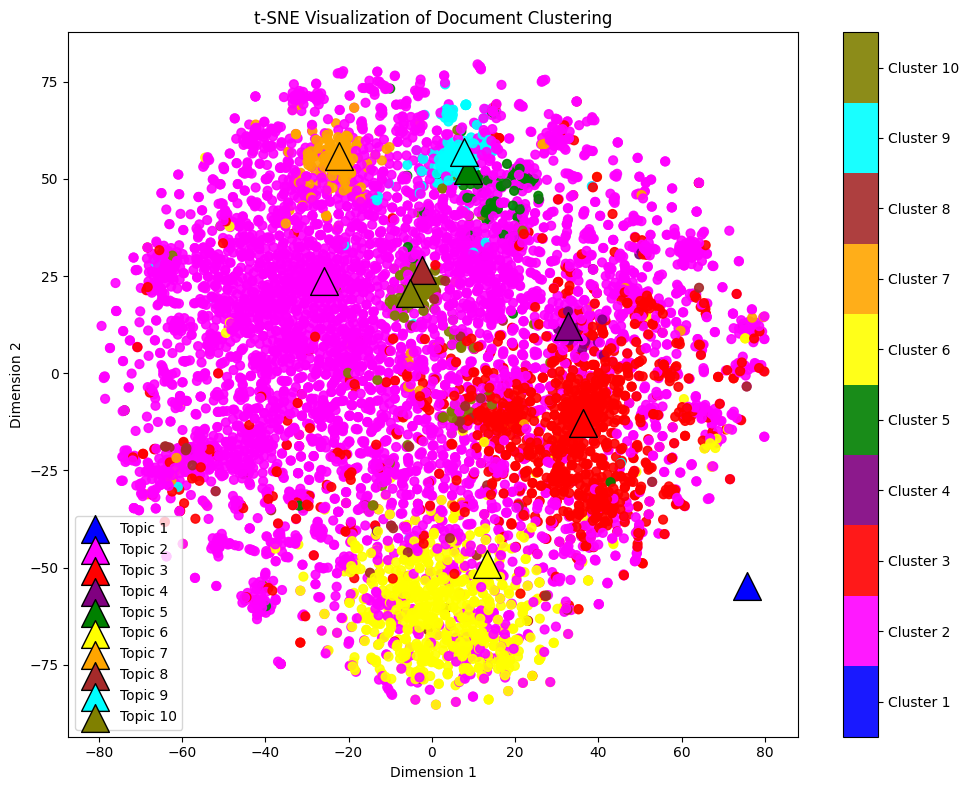

In [18]:
colors = [
    'blue', 'magenta', 'red', 'purple', 'green', 
    'yellow', 'orange', 'brown', 'cyan', 'olive'
]

cmap = ListedColormap(colors[:n_components])

plt.figure(figsize=(10, 8))

docs_scatter = plt.scatter(
    x=docs_tsne[:, 0],
    y=docs_tsne[:, 1],
    c=docs_labels,
    cmap=cmap,
    s=40,
    vmin=-0.5,
    vmax=n_components-0.5,
    alpha=0.9,
)

for i in range(n_components):
    plt.scatter(
        x=topics_tsne[i, 0],
        y=topics_tsne[i, 1],
        c=colors[i],
        marker='^',
        s=400,  
        edgecolor='black',
        label=f'Topic {i+1}',
        zorder=10 
    )

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization of Document Clustering', )

plt.legend()

cbar = plt.colorbar(docs_scatter, ticks=np.arange(n_components))
cbar.set_ticklabels([f'Cluster {i+1}' for i in range(n_components)])

plt.tight_layout()
plt.show()